### Looking for correlation between Aid and Infant Mortality Rates

by Julia Sweet

We searched for correlations between aid and infant mortality rates. We would expect improved infant mortality rates after reciept of aid, so we looked at 2, 4, and 6 year intervals. 

In [199]:
import pandas as pd
import numpy as np
import plotly 
import cufflinks as cf
import wbpy
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
plotly.tools.set_credentials_file(username='richongo', api_key='knfESm6zSffWin5ujtln')
import matplotlib.pyplot as plt
import scipy.stats as stats

In [200]:
#Import Aid data
file1 = "Economic_vs_Military.xlsx"
Aid_df = pd.read_excel(file1)
file2= "InfantMortality.csv"
Aid_df = Aid_df.rename(columns={"Row Labels": "Country"})
InfantMortality_df = pd.read_csv(file2)

InfantMortality_df.head()


,Unnamed: 0,Year,Angola,Burundi,Benin,Ethiopia,Ghana,Kenya,Madagascar,Mali,Mozambique,Namibia,Nigeria,Rwanda,Senegal,Sierra Leone,Somalia,Uganda,South Africa,Zimbabwe
0,0,2002,95971.0,24984.0,25051.0,236821.0,41281.0,75705.0,40879.0,59444.0,85134.0,2804.0,568287.0,29228.0,25026.0,29723.0,46562.0,98596.0,59495.0,23990.0
1,1,2003,95253.0,24759.0,24920.0,227584.0,40940.0,73661.0,39524.0,58812.0,82977.0,2780.0,564928.0,27352.0,24344.0,29885.0,47551.0,96119.0,59666.0,24394.0
2,2,2004,93986.0,24537.0,24813.0,217766.0,40789.0,71278.0,38252.0,58033.0,80906.0,2724.0,560267.0,25200.0,23665.0,29984.0,48604.0,93242.0,59263.0,25221.0
3,3,2005,92430.0,24267.0,24755.0,207679.0,40758.0,68408.0,37048.0,57135.0,78926.0,2559.0,554716.0,23209.0,23032.0,29984.0,49701.0,90154.0,58548.0,26068.0
4,4,2006,90346.0,23937.0,24793.0,198004.0,40772.0,65861.0,35925.0,56376.0,76947.0,2461.0,548359.0,21394.0,22467.0,29798.0,50689.0,87169.0,57132.0,27209.0


In [201]:
Infant_Mortality = InfantMortality_df.drop(columns=["Unnamed: 0"])
Infant_Mortality.head()

,Year,Angola,Burundi,Benin,Ethiopia,Ghana,Kenya,Madagascar,Mali,Mozambique,Namibia,Nigeria,Rwanda,Senegal,Sierra Leone,Somalia,Uganda,South Africa,Zimbabwe
0,2002,95971.0,24984.0,25051.0,236821.0,41281.0,75705.0,40879.0,59444.0,85134.0,2804.0,568287.0,29228.0,25026.0,29723.0,46562.0,98596.0,59495.0,23990.0
1,2003,95253.0,24759.0,24920.0,227584.0,40940.0,73661.0,39524.0,58812.0,82977.0,2780.0,564928.0,27352.0,24344.0,29885.0,47551.0,96119.0,59666.0,24394.0
2,2004,93986.0,24537.0,24813.0,217766.0,40789.0,71278.0,38252.0,58033.0,80906.0,2724.0,560267.0,25200.0,23665.0,29984.0,48604.0,93242.0,59263.0,25221.0
3,2005,92430.0,24267.0,24755.0,207679.0,40758.0,68408.0,37048.0,57135.0,78926.0,2559.0,554716.0,23209.0,23032.0,29984.0,49701.0,90154.0,58548.0,26068.0
4,2006,90346.0,23937.0,24793.0,198004.0,40772.0,65861.0,35925.0,56376.0,76947.0,2461.0,548359.0,21394.0,22467.0,29798.0,50689.0,87169.0,57132.0,27209.0


In [202]:
InfantMortality_melt=Infant_Mortality.melt(id_vars=["Year"],
                                              var_name="Country",
                                              value_name="Infant Mortality")
InfantMortality_melt.head(10)

,Year,Country,Infant Mortality
0,2002,Angola,95971.0
1,2003,Angola,95253.0
2,2004,Angola,93986.0
3,2005,Angola,92430.0
4,2006,Angola,90346.0
5,2007,Angola,87956.0
6,2008,Angola,85249.0
7,2009,Angola,82217.0
8,2010,Angola,79220.0
9,2011,Angola,76226.0


In [203]:
combined_data=pd.merge(Aid_df, InfantMortality_melt, on=["Country", "Year"])
combined_data.head()

,Country,Year,Economic,Military,Grand Total,Infant Mortality
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08,95971.0
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08,95253.0
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08,93986.0
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07,92430.0
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07,90346.0


In [204]:
CombinedAid_InfantMortality= combined_data.rename(index=str, columns={"Grand Total": "Total Aid"})


In [205]:
# Group by country and shift two years ahead to see whether there is any impact. 
CombinedAid_InfantMortality_2=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_2['Infant Mortality_2'] = CombinedAid_InfantMortality.groupby(['Country'])['Infant Mortality'].shift(-2)
CombinedAid_InfantMortality_2= CombinedAid_InfantMortality_2.dropna()

# Group by country; shift four years ahead to see effect
CombinedAid_InfantMortality_4=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_4['Infant Mortality_4'] = CombinedAid_InfantMortality.groupby(['Country'])['Infant Mortality'].shift(-4)
CombinedAid_InfantMortality_4= CombinedAid_InfantMortality_4.dropna()

# Repeat for 6-year impact
CombinedAid_InfantMortality_6=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_6['Infant Mortality_6'] = CombinedAid_InfantMortality.groupby(['Country'])['Infant Mortality'].shift(-6)
CombinedAid_InfantMortality_6= CombinedAid_InfantMortality_6.dropna()

CombinedAid_InfantMortality_6.head()


,Country,Year,Economic,Military,Total Aid,Infant Mortality,Infant Mortality_6
0,Angola,2002,1.659227e+08,0.000000,1.659227e+08,95971.0,85249.0
1,Angola,2003,2.155944e+08,395057.529807,2.159894e+08,95253.0,82217.0
2,Angola,2004,1.520490e+08,638258.217553,1.526873e+08,93986.0,79220.0
3,Angola,2005,8.311513e+07,387385.061877,8.350252e+07,92430.0,76226.0
4,Angola,2006,9.623060e+07,768343.338990,9.699894e+07,90346.0,73448.0


In [206]:
# Group by country and shift two years ahead to see whether there is any impact. 
CombinedAid_InfantMortality_2=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_2['Infant Mortality_2'] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Infant Mortality'].shift(-2)
CombinedAid_InfantMortality_2= CombinedAid_InfantMortality_2.dropna()

# Group by country; shift four years ahead to see effect
CombinedAid_InfantMortality_4=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_4['Infant Mortality_4'] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Infant Mortality'].shift(-4)
CombinedAid_InfantMortality_4= CombinedAid_InfantMortality_4.dropna()

# Repeat for 6-year impact
CombinedAid_InfantMortality_6=CombinedAid_InfantMortality.copy()
CombinedAid_InfantMortality_6['Infant Mortality_6'] = CombinedAid_InfantMortality.groupby(
    ['Country'])['Infant Mortality'].shift(-6)
CombinedAid_InfantMortality_6= CombinedAid_InfantMortality_6.dropna()

CombinedAid_InfantMortality_6


,Country,Year,Economic,Military,Total Aid,Infant Mortality,Infant Mortality_6
0,Angola,2002,1.659227e+08,0.000000e+00,1.659227e+08,95971.0,85249.0
1,Angola,2003,2.155944e+08,3.950575e+05,2.159894e+08,95253.0,82217.0
2,Angola,2004,1.520490e+08,6.382582e+05,1.526873e+08,93986.0,79220.0
3,Angola,2005,8.311513e+07,3.873851e+05,8.350252e+07,92430.0,76226.0
4,Angola,2006,9.623060e+07,7.683433e+05,9.699894e+07,90346.0,73448.0
5,Angola,2007,6.191552e+07,5.123027e+05,6.242783e+07,87956.0,70939.0
6,Angola,2008,6.537215e+07,3.967068e+05,6.576886e+07,85249.0,68913.0
7,Angola,2009,6.095525e+07,5.356674e+05,6.149092e+07,82217.0,67337.0
8,Angola,2010,1.114652e+08,4.178502e+05,1.118831e+08,79220.0,65993.0
9,Angola,2011,8.945588e+07,4.589350e+05,8.991482e+07,76226.0,65045.0


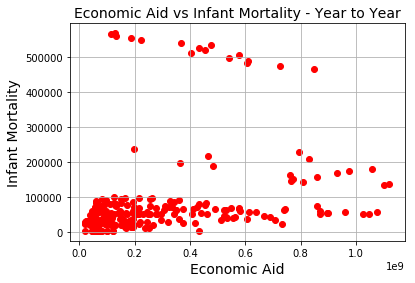

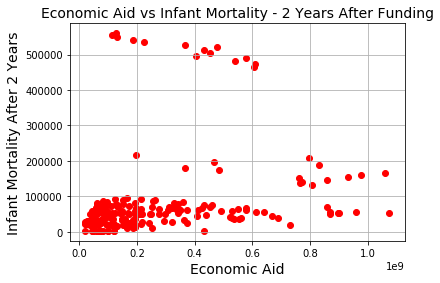

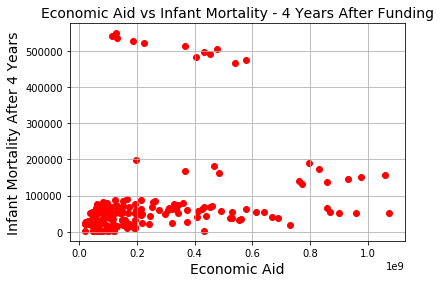

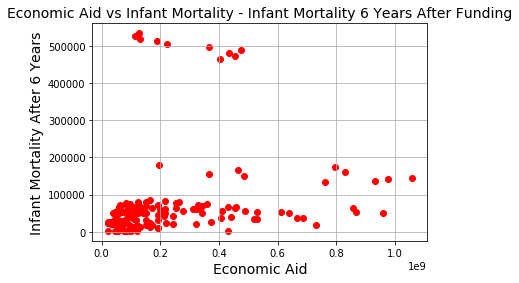

In [207]:
plt.scatter(CombinedAid_InfantMortality['Economic'], 
            CombinedAid_InfantMortality['Infant Mortality'], c='red')
plt.title('Economic Aid vs Infant Mortality - Year to Year', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 2 years after 
plt.scatter(CombinedAid_InfantMortality_2['Economic'], 
            CombinedAid_InfantMortality_2['Infant Mortality_2'], color='red')
plt.title('Economic Aid vs Infant Mortality - 2 Years After Funding', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality After 2 Years', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 4 years after 
plt.scatter(CombinedAid_InfantMortality_4['Economic'], 
            CombinedAid_InfantMortality_4['Infant Mortality_4'], color='red')
plt.title('Economic Aid vs Infant Mortality - 4 Years After Funding', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality After 4 Years', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Economic vs Stability for funding 6 years after 
plt.scatter(CombinedAid_InfantMortality_6['Economic'], 
            CombinedAid_InfantMortality_6['Infant Mortality_6'], color='red')
plt.title('Economic Aid vs Infant Mortality - Infant Mortality 6 Years After Funding', fontsize=14)
plt.xlabel('Economic Aid', fontsize=14)
plt.ylabel('Infant Mortality After 6 Years', fontsize=14)
plt.grid(True)
plt.show()

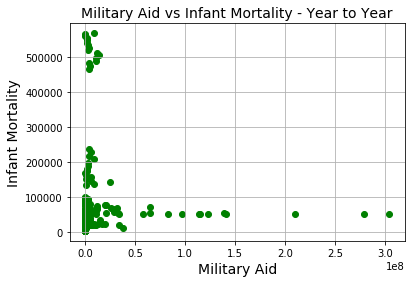

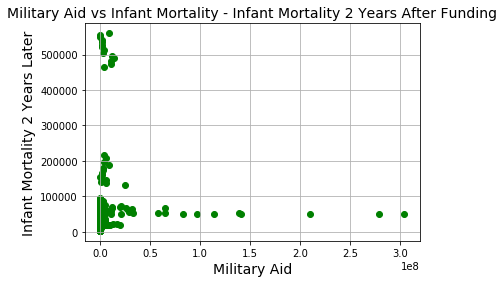

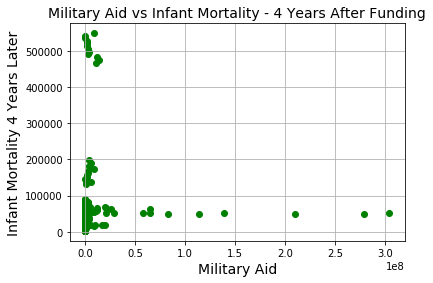

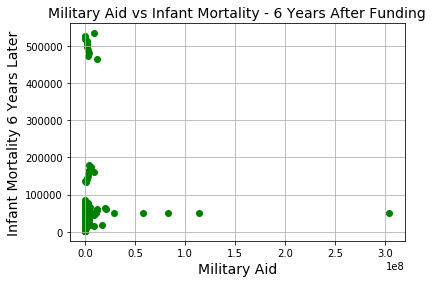

In [196]:
#Scatter Military vs Infant Mortality for funding on Year
plt.scatter(CombinedAid_InfantMortality['Military'], 
            CombinedAid_InfantMortality['Infant Mortality'], color='green')
plt.title('Military Aid vs Infant Mortality - Year to Year', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Infant Mortality', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Military vs Infant Mortality for funding 2 years after
plt.scatter(CombinedAid_InfantMortality_2['Military'], 
            CombinedAid_InfantMortality_2['Infant Mortality_2'], color='green')
plt.title('Military Aid vs Infant Mortality - Infant Mortality 2 Years After Funding', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Infant Mortality 2 Years Later', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Military vs Infant Mortality for funding 4 years after
plt.scatter(CombinedAid_InfantMortality_4['Military'], 
            CombinedAid_InfantMortality_4['Infant Mortality_4'], color='green')
plt.title('Military Aid vs Infant Mortality - 4 Years After Funding', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Infant Mortality 4 Years Later', fontsize=14)
plt.grid(True)
plt.show()

#Scatter Military vs Infant Mortality for funding 6 years after
plt.scatter(CombinedAid_InfantMortality_6['Military'], 
            CombinedAid_InfantMortality_6['Infant Mortality_6'], color='green')
plt.title('Military Aid vs Infant Mortality - 6 Years After Funding', fontsize=14)
plt.xlabel('Military Aid', fontsize=14)
plt.ylabel('Infant Mortality 6 Years Later', fontsize=14)
plt.grid(True)
plt.show()





In [208]:
# Begin regression with Ricardo's starter code
from sklearn import linear_model
X0 = CombinedAid_InfantMortality[['Economic', 'Military']] # here we have 2 variables 
#for multiple regression. If you just want to use one variable for simple linear regression, 
#then use X = df['Economic'] for example. Alternatively, you may add additional variables within the brackets
Y0 = CombinedAid_InfantMortality['Infant Mortality'] 

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X0, Y0)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 41056.45646967007
Coefficients: 
 [ 0.0001439 -0.0002036]


In [137]:
import statsmodels.api as sm
# with statsmodels
X = sm.add_constant(X0) # adding a constant 
model = sm.OLS(Y0, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:       Infant Mortality   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     16.30
Date:                Thu, 18 Jul 2019   Prob (F-statistic):           1.99e-07
Time:                        20:20:42   Log-Likelihood:                -3749.7
No. Observations:                 288   AIC:                             7505.
Df Residuals:                     285   BIC:                             7516.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.106e+04   9054.968      4.534      0.0

C:\Users\julia\anaconda\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [209]:
CombinedAid_InfantMortality.iplot(kind='bubble', x='Year', y='Infant Mortality', size='Total Aid', text='Country',
                           title='Aid to Infant Mortality', xTitle='Year', yTitle='Infant Mortality',
                           mode='markers', filename='Aid_vs_InfantMortality_bubbleplot')


## The data do not demonstrate a correlation between receipt of aid and improved rates of infant mortality. 